In [1]:
from math import log10, sqrt
import numpy as np,sys
from skimage import io
from matplotlib import pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from imageio import imread

## Loading the image

In [2]:
img = imread('/Users/aneruthmohanasundaram/Documents/GitHub/Project_Alina/Data/Test3.jpg')

In [3]:
# A function to add random noise to our image
def add_noise_to_image(image):
  ''' Considering only the gaussian noise filtering but we can choose different noise by changing the mode'''
  noise_image = random_noise(image,mode='gaussian',seed=None, clip=True)
  return noise_image

In [4]:
# A function to check the Peak Signal Ratio
def psnr(orgImg, nosiyImage): 
	mse = np.mean((orgImg - nosiyImage) ** 2) 
	if(mse == 0):return 100
	maximum_pixel_can_be_used = 255.0 # This number can be cahnged according to our wish
	ratio = 20 * log10(maximum_pixel_can_be_used / sqrt(mse)) 
	return ratio

In [5]:
def rgbToBlack(image):
  image_copy = image
  height, width, channels = image.shape
  for i in range(height):
    for j in range(width):
        image_copy[i,j] = 0.3 * img[i,j][0] + 0.59 * img[i,j][1] +  0.11 * img[i,j][2]
  return image_copy

## Image analysis

Type of the given image is <class 'imageio.core.util.Array'>
Size of given image is (4000, 1800, 3)
Height of given image is 4000
Width of given image is 1800
Diemension of the given image is 3
PSNR value is: 5.887537086388255 dB


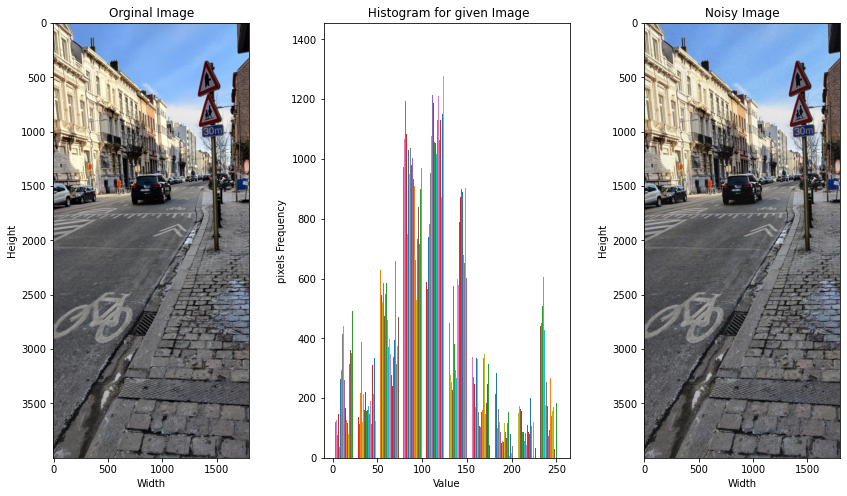

In [6]:
print(f'Type of the given image is {type(img)}')
print(f'Size of given image is {img.shape}')
print(f'Height of given image is {img.shape[0]}')
print(f'Width of given image is {img.shape[1]}')
print(f'Diemension of the given image is {img.ndim}')
print(f'PSNR value is: {psnr(img, add_noise_to_image(img))} dB')

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))

# to plot the image
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Orginal Image')
axes[0].imshow(img)

# hist function is used to plot the histogram of an image.
axes[1].set_xlabel("Value")
axes[1].set_ylabel("pixels Frequency")
axes[1].set_title(" Histogram for given Image")
axes[1].hist(img[:,:,0]) # Using the image slicing to convert the 3D image to 2D image for the sake of plotting

# to plot the noisy image
axes[2].set_xlabel('Width')
axes[2].set_ylabel('Height')
axes[2].set_title('Noisy Image')
axes[2].imshow(add_noise_to_image(img))

In [ ]:
# height,width,channels = img.shape

# # A function to create bilateral filter
# def bilateralFilter(image,sigma):
#   output_image = np.zeros([height,width,channels]) # an empty numpy array to store the image
#   # Iterating over each pixel
#   for i in range(height):
#     for j in range(width):
#       ip,w = 0,0
#       # Sliding thorough the window size
#       for x in range(-5,5):
#         for y in range(-5,5):
#           q_y = np.max([0, np.min([height - 1, i + x])])
#           q_x = np.max([0, np.min([width - 1, j + y])])
#           # Computer Gaussian filter weight at this filter pixel
#           g = np.exp( -((q_x - j)**2 + (q_y - i)**2) / (2 * sigma**2) )
#           # Accumulate filtered output
#           ip += g * image[i, j, :]
#           # Accumulate filter weight for later normalization, to maintain image brightness
#           w += g
#     output_image[i, j, :] = ip / (w + np.finfo(np.float32).eps)
#   return output_image

In [ ]:
# plt.imshow(bilateralFilter(add_noise_to_image(img),20))

## Defining Gaussian Kernel

In [7]:
def vec_gaussian(img, variance):
    # For applying gaussian function for each element in matrix.
    sigma = math.sqrt(variance)
    cons = 1 / (sigma * math.sqrt(2 * math.pi))
    return cons * np.exp(-((img / sigma) ** 2) * 0.5)

In [8]:
def get_slice(img, x, y, kernel_size):
    half = kernel_size // 2
    return img[x - half : x + half + 1, y - half : y + half + 1]

In [9]:
def get_gauss_kernel(kernel_size, spatial_variance):
    # Creates a gaussian kernel of given dimension.
    arr = np.zeros((kernel_size, kernel_size))
    for i in range(0, kernel_size):
        for j in range(0, kernel_size):
            arr[i, j] = math.sqrt(
                abs(i - kernel_size // 2) ** 2 + abs(j - kernel_size // 2) ** 2
            )
    return vec_gaussian(arr, spatial_variance)

In [10]:
def bilateral_filter(img,spatial_variance,intensity_variance,kernel_size,):
    img2 = np.zeros(img.shape)
    gaussKer = get_gauss_kernel(kernel_size, spatial_variance)
    sizeX, sizeY = img.shape
    for i in range(kernel_size // 2, sizeX - kernel_size // 2):
        for j in range(kernel_size // 2, sizeY - kernel_size // 2):
 
            imgS = get_slice(img, i, j, kernel_size)
            imgI = imgS - imgS[kernel_size // 2, kernel_size // 2]
            imgIG = vec_gaussian(imgI, intensity_variance)
            weights = np.multiply(gaussKer, imgIG)
            vals = np.multiply(imgS, weights)
            val = np.sum(vals) / np.sum(weights)
            img2[i, j] = val
    return img2

In [14]:
def parse_args(args):
    filename = args[1] if args[1:] else img
    spatial_variance = float(args[2]) if args[2:] else 1.0
    intensity_variance = float(args[3]) if args[3:] else 1.0
    if args[4:]:
        kernel_size = int(args[4])
        kernel_size = kernel_size + abs(kernel_size % 2 - 1)
    else:
        kernel_size = 5
    return filename, spatial_variance, intensity_variance, kernel_size

In [15]:
filename, spatial_variance, intensity_variance, kernel_size = parse_args(sys.argv)

ValueError: could not convert string to float: '--stdin=9003'

In [23]:
var = np.var(img)

In [24]:
var

3512.7556913377866

In [13]:
img

Array([[[251, 251, 215],
        [255, 255, 223],
        [255, 255, 220],
        ...,
        [ 10,   5,   9],
        [  9,   4,   8],
        [  6,   1,   5]],

       [[255, 255, 221],
        [245, 245, 211],
        [251, 251, 217],
        ...,
        [  7,   2,   6],
        [  6,   1,   5],
        [  4,   0,   3]],

       [[255, 255, 227],
        [252, 251, 220],
        [255, 255, 224],
        ...,
        [ 10,   5,   9],
        [ 10,   5,   9],
        [ 10,   5,   9]],

       ...,

       [[ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 87,  86,  91],
        [ 82,  81,  86],
        [ 73,  72,  77]],

       [[109, 109, 109],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [ 84,  83,  88],
        [ 78,  77,  82],
        [ 64,  63,  68]],

       [[105, 105, 105],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 83,  82,  87],
        [ 77,  76,  81],
        [ 61,  60,  65]]